In [1]:
# import all necessary libraries
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
from utils.plotData import plotData
from utils.mapFeature import mapFeature
from utils.costFunctionReg import costFunctionReg,gradientReg
from utils.plotDecisionBoundary import plotDecisionBoundary
from utils.predict import predict

In [2]:
# Load Data
# The first two columns contains the X values and the third column contains the label (y).
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = np.array(data[:, :2])
y = np.reshape(data[:, 2], (X.shape[0], 1))

# Plot training data

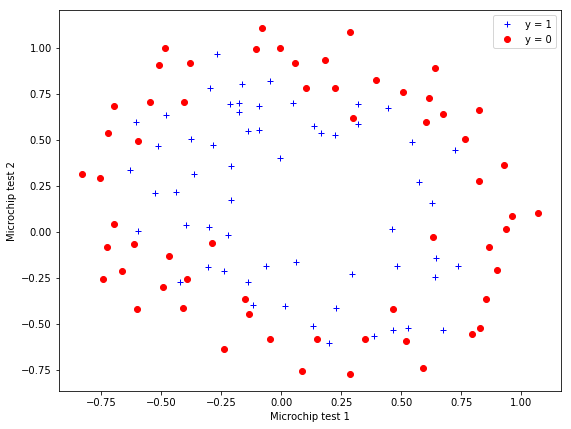

In [3]:
plt.figure(figsize=(9, 7))
positives = np.where(y == 1)
negatives = np.where(y == 0)
plt.plot(X[positives[0], 0], X[positives[0], 1], 'bo', marker='+', label='y = 1')
plt.plot(X[negatives[0], 0], X[negatives[0], 1], 'ro', marker='o', label='y = 0')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend()
plt.show(block=False)

# Part 1: Regularized Logistic Regression

In [4]:
designMatrix = np.column_stack((np.ones(len(X)), X))  # Add intercept term to x and X_test
X = mapFeature(designMatrix[:, 1], designMatrix[:, 2])
initial_theta = np.zeros((X.shape[1], 1))  # Initialize fitting parameters
lambda_reg = 1
cost = costFunctionReg(initial_theta, X, y, lambda_reg)
grad = gradientReg(initial_theta, X, y, lambda_reg)
print('Cost at initial theta (zeros): ', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:')
print(grad[:5])
print('\nExpected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros):  0.69314718056
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:
[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]

Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [5]:
# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1], 1))
cost = costFunctionReg(test_theta, X, y, 10)
grad = gradientReg(test_theta, X, y, 10)

print('\nCost at test theta (with lambda = 10): \n', cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:')
print(grad[:5])
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at test theta (with lambda = 10): 
 3.16450933162
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
[[ 0.34604507]
 [ 0.16135192]
 [ 0.19479576]
 [ 0.22686278]
 [ 0.09218568]]
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



# Part 2: Regularization and Accuracies

Here I have tried to analyze the various optimization algorithms and the accuracies they yield

# For Lambda = 1; using BFGS optimization algorithm

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48


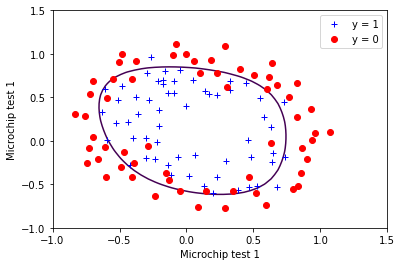

Train Accuracy: 83.0508474576
Expected accuracy (approx): 89.0



In [6]:
from utils.plotDecisionBoundaryReg import plotDecisionBoundaryReg
initial_theta = np.zeros((X.shape[1], 1))  # Initialize fitting parameters
lambda_reg = 1
optimizedTheta = op.fmin_bfgs(costFunctionReg, x0=initial_theta, args=(X, y, lambda_reg), maxiter=1000)
plotDecisionBoundaryReg(optimizedTheta, X, y)

# Compute accuracy on our training set
p = predict(optimizedTheta, X)

# element wise comparison of predictions made with the training data and calculating the accuracy %
print('Train Accuracy:', np.mean((p == y)) * 100)
print('Expected accuracy (approx): 89.0\n')

# For Lambda = 0; using BFGS optimization algorithm

Optimization terminated successfully.
         Current function value: 0.235474
         Iterations: 542
         Function evaluations: 17670
         Gradient evaluations: 589


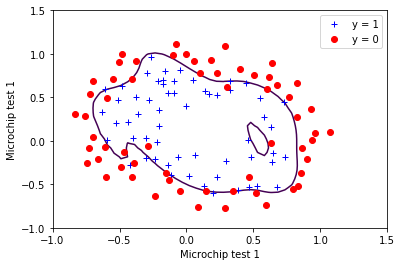

Train Accuracy: 88.9830508475
Expected accuracy (approx): 89.0



In [7]:
initial_theta = np.zeros((X.shape[1], 1))  # Initialize fitting parameters
lambda_reg = 0
optimizedTheta = op.fmin_bfgs(costFunctionReg, x0=initial_theta, args=(X, y, lambda_reg), maxiter=1000)
plotDecisionBoundaryReg(optimizedTheta, X, y)

# Compute accuracy on our training set
p = predict(optimizedTheta, X)

# element wise comparison of predictions made with the training data and calculating the accuracy %
print('Train Accuracy:', np.mean((p == y)) * 100)
print('Expected accuracy (approx): 89.0\n')

# For Lambda = 10; using BFGS optimization algorithm

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 660
         Gradient evaluations: 22


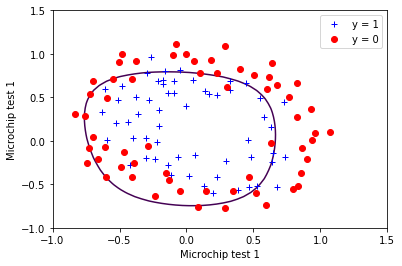

Train Accuracy: 74.5762711864
Expected accuracy (approx): 89.0



In [8]:
initial_theta = np.zeros((X.shape[1], 1))  # Initialize fitting parameters
lambda_reg = 10
optimizedTheta = op.fmin_bfgs(costFunctionReg, x0=initial_theta, args=(X, y, lambda_reg), maxiter=1000)
plotDecisionBoundaryReg(optimizedTheta, X, y)

# Compute accuracy on our training set
p = predict(optimizedTheta, X)

# element wise comparison of predictions made with the training data and calculating the accuracy %
print('Train Accuracy:', np.mean((p == y)) * 100)
print('Expected accuracy (approx): 89.0\n')

# For Lambda = 100; using BFGS optimization algorithm

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 240
         Gradient evaluations: 8


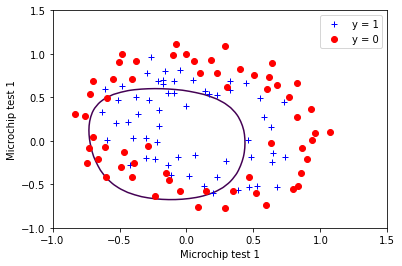

Train Accuracy: 61.0169491525
Expected accuracy (approx): 89.0



In [9]:
initial_theta = np.zeros((X.shape[1], 1))  # Initialize fitting parameters
lambda_reg = 100
optimizedTheta = op.fmin_bfgs(costFunctionReg, x0=initial_theta, args=(X, y, lambda_reg), maxiter=1000)
plotDecisionBoundaryReg(optimizedTheta, X, y)

# Compute accuracy on our training set
p = predict(optimizedTheta, X)

# element wise comparison of predictions made with the training data and calculating the accuracy %
print('Train Accuracy:', np.mean((p == y)) * 100)
print('Expected accuracy (approx): 89.0\n')

# For Lambda = 0; using Conjugate Gradient optimization

         Current function value: 0.271937
         Iterations: 1000
         Function evaluations: 108930
         Gradient evaluations: 3631


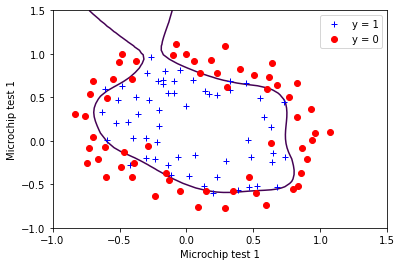

Train Accuracy: 86.4406779661
Expected accuracy (approx): 89.0



In [10]:
initial_theta = np.zeros((X.shape[1], 1))  # Initialize fitting parameters
lambda_reg = 0
optimizedTheta = op.fmin_cg(costFunctionReg, x0=initial_theta, args=(X, y, lambda_reg), maxiter=1000)
plotDecisionBoundaryReg(optimizedTheta, X, y)

# Compute accuracy on our training set
p = predict(optimizedTheta, X)

# element wise comparison of predictions made with the training data and calculating the accuracy %
print('Train Accuracy:', np.mean((p == y)) * 100)
print('Expected accuracy (approx): 89.0\n')

# For Lambda = 1; using Conjugate Gradient optimization

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 19
         Function evaluations: 1650
         Gradient evaluations: 55


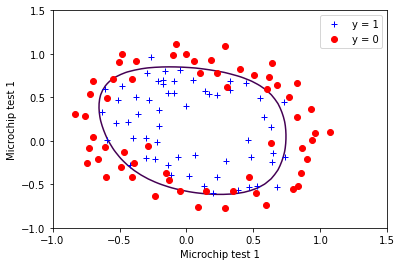

Train Accuracy: 83.0508474576
Expected accuracy (approx): 89.0



In [11]:
initial_theta = np.zeros((X.shape[1], 1))  # Initialize fitting parameters
lambda_reg = 1
optimizedTheta = op.fmin_cg(costFunctionReg, x0=initial_theta, args=(X, y, lambda_reg), maxiter=1000)
plotDecisionBoundaryReg(optimizedTheta, X, y)

# Compute accuracy on our training set
p = predict(optimizedTheta, X)

# element wise comparison of predictions made with the training data and calculating the accuracy %
print('Train Accuracy:', np.mean((p == y)) * 100)
print('Expected accuracy (approx): 89.0\n')